***Supermarket sales***

Reading dataset

In [ ]:
%autosave 5

Autosaving every 5 seconds


In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


pd.set_option('display.max_columns',None)

In [ ]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv("data.csv")

In [ ]:
#statistical information about the dataset
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


**Data Preprocessing**

In [ ]:
# getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# inspecting the first 5 rows of the dataframe
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# inspecting the last 5 rows of the dataframe
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [ ]:
# checking the number of rows and columns
data.shape

(1000, 17)

In [ ]:
# Get unique values in the dataframe
data.drop_duplicates( inplace=True)

In [ ]:
data.shape

(1000, 17)

In [ ]:
# converting DateTime to date using pd.to_datetime
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Get the dtype of the date column
data['Date'].dtypes

dtype('<M8[ns]')

In [ ]:
# separate the day from the date and put it in separated column
data['Day'] = data['Date'].dt.day 

In [ ]:
# separate the month from the date and put it in separated column
data['Month'] = data['Date'].dt.month

In [ ]:
# separate the year from the date and put it in separated column
data['Year'] = data['Date'].dt.year 

In [ ]:
# converting Time to date using pd.to_datetime
data["Time"]= pd.to_datetime(data["Time"])

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-02-22 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-02-22 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-02-22 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-02-22 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-02-22 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [ ]:
# separate the hours from the time column and put it in separated column
data['Hours'] = data['Time'].dt.hour

In [ ]:
# use agg() function to know the number of times each value occurs in Quantity column
quantity_count = data.groupby('Quantity').agg(Count=('Quantity', 'size')).reset_index()

In [ ]:
quantity_count

,Quantity,Count
0,1,112
1,2,91
2,3,90
3,4,109
4,5,102
5,6,98
6,7,102
7,8,85
8,9,92
9,10,119


In [ ]:
# use agg() function to know the number of times each value occurs in Product line column
pl_count = data.groupby('Product line').agg(Count=('Product line', 'size')).reset_index()

In [ ]:
pl_count

,Product line,Count
0,Electronic accessories,170
1,Fashion accessories,178
2,Food and beverages,174
3,Health and beauty,152
4,Home and lifestyle,160
5,Sports and travel,166


In [ ]:
# use agg() function to know the number of times each value occurs in Customer type column
ct_count = data.groupby('Customer type').agg(Count=('Customer type', 'size')).reset_index()

In [ ]:
ct_count

,Customer type,Count
0,Member,501
1,Normal,499


In [ ]:
# use agg() function to know the number of times each value occurs in Gender column
gender_count = data.groupby('Gender').agg(Count=('Gender', 'size')).reset_index()

In [ ]:
gender_count

,Gender,Count
0,Female,501
1,Male,499


In [ ]:
# use agg() function to know the number of times each value occurs in Branch column
branch_count = data.groupby('Branch').agg(Count=('Branch', 'size')).reset_index()

In [ ]:
branch_count

,Branch,Count
0,A,340
1,B,332
2,C,328


In [ ]:
# use agg() function to know the number of times each value occurs in Payment column
payment_count = data.groupby('Payment').agg(Count=('Payment', 'size')).reset_index()

In [ ]:
payment_count

,Payment,Count
0,Cash,344
1,Credit card,311
2,Ewallet,345


In [ ]:
# Total methods in each branch using agg() function
branch_pay = data.groupby(['Branch', 'Payment']).agg(TotalCount=('Payment', 'size'))

In [ ]:
branch_pay

TotalCount
Branch Payment                
A      Cash                110
       Credit card         104
       Ewallet             126
B      Cash                110
       Credit card         109
       Ewallet             113
C      Cash                124
       Credit card          98
       Ewallet             106

In [ ]:
# How many Female and male intersested in each product line 
gender_pl = data.groupby(['Product line', 'Gender']).agg(TotalCount=('Gender', 'size'))

In [ ]:
gender_pl

TotalCount
Product line           Gender            
Electronic accessories Female          84
                       Male            86
Fashion accessories    Female          96
                       Male            82
Food and beverages     Female          90
                       Male            84
Health and beauty      Female          64
                       Male            88
Home and lifestyle     Female          79
                       Male            81
Sports and travel      Female          88
                       Male            78

In [ ]:
# Total customer types[Member, Normal] in each branch
branch_ct = data.groupby(['Branch', 'Customer type']).agg(TotalCount=('Customer type', 'size'))

In [ ]:
branch_ct

TotalCount
Branch Customer type            
A      Member                167
       Normal                173
B      Member                165
       Normal                167
C      Member                169
       Normal                159

In [ ]:
# Total Gender[Female, Male] in each branch
branch_gender = data.groupby(['Branch', 'Gender']).agg(TotalCount=('Gender', 'size'))

In [ ]:
branch_gender

TotalCount
Branch Gender            
A      Female         161
       Male           179
B      Female         162
       Male           170
C      Female         178
       Male           150

In [ ]:
# Total Gender in each customer type 
ct_gender = data.groupby(['Customer type', 'Gender']).agg(TotalCount=('Gender', 'size'))

In [ ]:
ct_gender

TotalCount
Customer type Gender            
Member        Female         261
              Male           240
Normal        Female         240
              Male           259

In [ ]:
# calculate mean, sum, min, max of unit price in each branch using agg function
price_stats = data.groupby('Branch').agg(
    Mean=('Unit price', 'mean'),
    Sum=('Unit price', 'sum'),
    Min=('Unit price', 'min'),
    Max=('Unit price', 'max'))

In [ ]:
price_stats

,Mean,Sum,Min,Max
Branch,,,,
A,54.780853,18625.49,10.08,99.83
B,55.659277,18478.88,10.59,99.96
C,56.609024,18567.76,10.16,99.96


**Visualising**

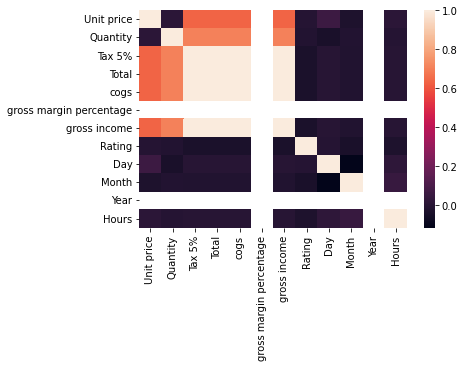

In [ ]:
# Making Heatmap
sns.heatmap(data.corr())

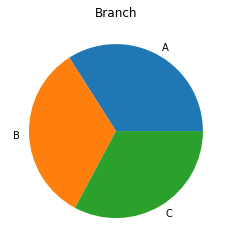

In [ ]:
# Branches of the supermarket using pie chart
branch_counts = data['Branch'].value_counts()
plt.pie(branch_counts, labels=branch_counts.index)
plt.title('Branch')
plt.show()

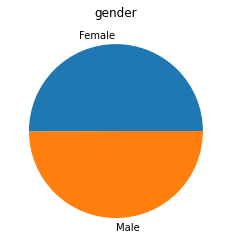

In [ ]:
# plot number of Female and Male 
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index)
plt.title('gender')
plt.show()

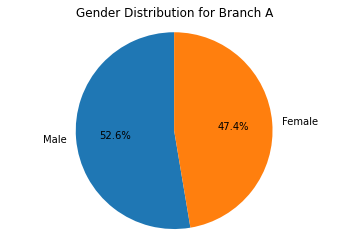

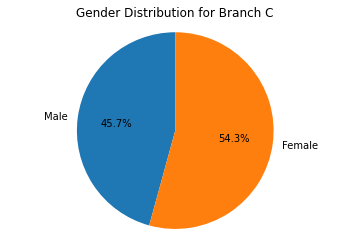

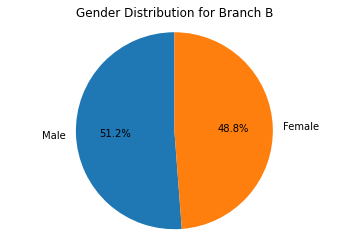

In [ ]:
# Ratio of females and males in each branch
grouped_data = data.groupby(['Branch', 'Gender']).size().reset_index(name='count')

branches = data['Branch'].unique()
colors = ['tab:blue', 'tab:orange']

for branch in branches:

    branch_data = grouped_data[grouped_data['Branch'] == branch]
    male_count = branch_data[branch_data['Gender'] == 'Male']['count'].values[0]
    female_count = branch_data[branch_data['Gender'] == 'Female']['count'].values[0]

    labels = ['Male', 'Female']
    counts = [male_count, female_count]
    plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Gender Distribution for Branch {}'.format(branch))
    plt.show()

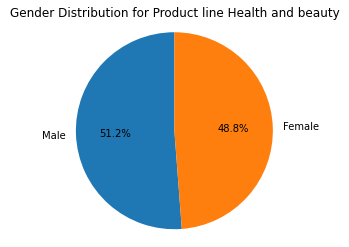

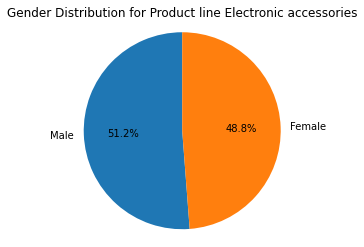

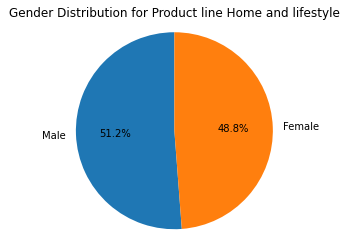

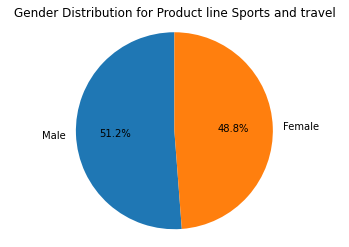

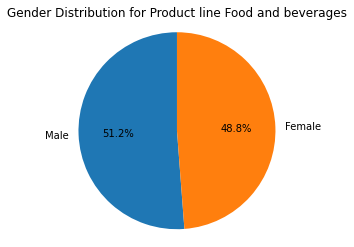

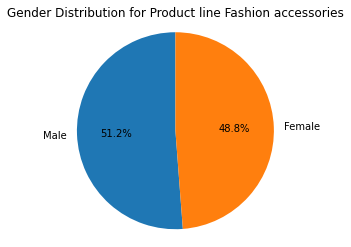

In [ ]:
# plot Female interests VS Male interest
grouped_data = data.groupby(['Product line', 'Gender']).size().reset_index(name='count')

lines = data['Product line'].unique()
colors = ['tab:blue', 'tab:orange']

for line in lines:

    line_data = grouped_data[grouped_data['Product line'] == line]
    male_count = branch_data[branch_data['Gender'] == 'Male']['count'].values[0]
    female_count = branch_data[branch_data['Gender'] == 'Female']['count'].values[0]

    labels = ['Male', 'Female']
    counts = [male_count, female_count]
    plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Gender Distribution for Product line {}'.format(line))
    plt.show()

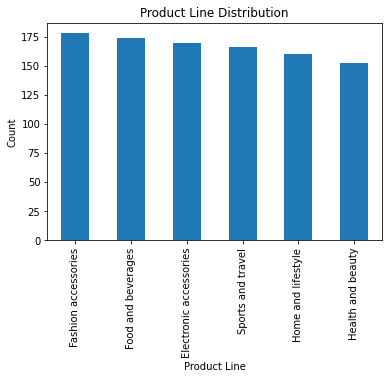

In [ ]:
# plot product line column
product_counts = data['Product line'].value_counts()
product_counts.plot(kind='bar', color='tab:blue')
plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.show()

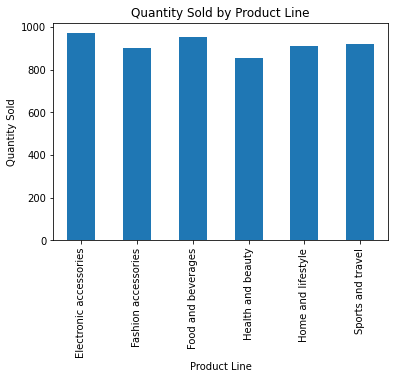

In [ ]:
# plot Quantity sold from each production line
quantity_by_product = data.groupby('Product line')['Quantity'].sum()
quantity_by_product.plot(kind='bar', color='tab:blue')
plt.title('Quantity Sold by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Quantity Sold')
plt.show()

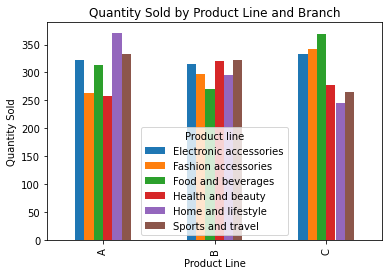

In [ ]:
# plot Quantity sold from each production line in each branch
quantity_by_branch_product = data.groupby(['Branch', 'Product line'])['Quantity'].sum()
quantity_by_branch_product = quantity_by_branch_product.unstack()
quantity_by_branch_product.plot(kind='bar', stacked=False)
plt.title('Quantity Sold by Product Line and Branch')
plt.xlabel('Product Line')
plt.ylabel('Quantity Sold')
plt.show()

In [ ]:
# The most requested production line in each branch
quantity_by_branch_product = data.groupby(['Branch', 'Product line'])['Quantity'].sum()
quantity_by_branch_product = quantity_by_branch_product.unstack()
quantity_by_branch_product.idxmax(axis=1)

Branch
A    Home and lifestyle
B     Sports and travel
C    Food and beverages
dtype: object

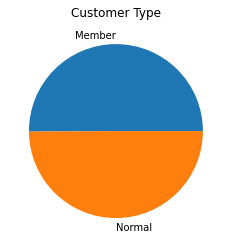

In [ ]:
# Customer type using pie chart
customer_counts = data['Customer type'].value_counts()
plt.pie(customer_counts, labels=customer_counts.index)
plt.title('Customer Type')
plt.show()

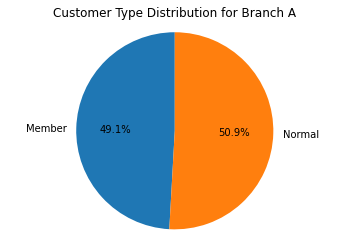

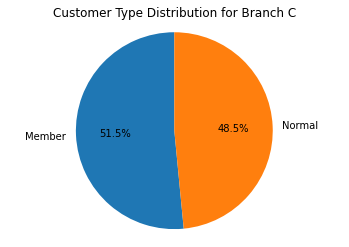

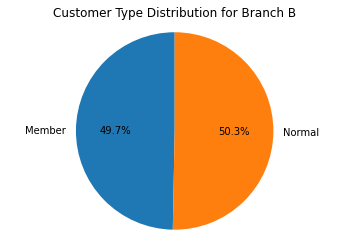

In [ ]:
# Customer type in each branch
grouped_data = data.groupby(['Branch', 'Customer type']).size().reset_index(name='count')

branches = data['Branch'].unique()
colors = ['tab:blue', 'tab:orange']

for branch in branches:

    branch_data = grouped_data[grouped_data['Branch'] == branch]
    member_count = branch_data[branch_data['Customer type'] == 'Member']['count'].values[0]
    normal_count = branch_data[branch_data['Customer type'] == 'Normal']['count'].values[0]

    labels = ['Member', 'Normal']
    counts = [member_count, normal_count]
    plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Customer Type Distribution for Branch {}'.format(branch))
    plt.show()

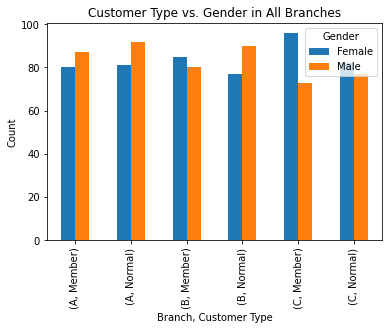

In [ ]:
# plot Customer Type VS Gender in all branches
grouped_data = data.groupby(['Branch', 'Customer type', 'Gender']).size().reset_index(name='count')
pivoted_data = grouped_data.pivot(index=['Branch', 'Customer type'], columns='Gender', values='count')
pivoted_data.plot(kind='bar', stacked=False)
plt.title('Customer Type vs. Gender in All Branches')
plt.xlabel('Branch, Customer Type')
plt.ylabel('Count')
plt.show()

Customer Type VS Gender Of Each Branch

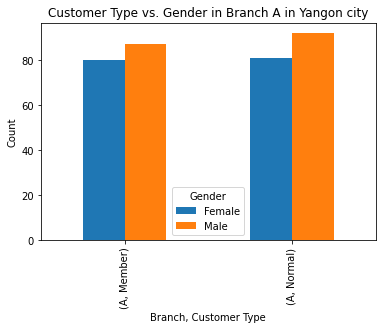

In [ ]:
# -Branch A in Yangon city
data_1 = data[data['Branch'].isin(['A']) & data['City'].isin(['Yangon'])]
data_1 = data_1.groupby(['Branch', 'Customer type', 'Gender']).size().reset_index(name='count')
pivoted_data = data_1.pivot(index=['Branch', 'Customer type'], columns='Gender', values='count')
pivoted_data.plot(kind='bar', stacked=False)
plt.title('Customer Type vs. Gender in Branch A in Yangon city')
plt.xlabel('Branch, Customer Type')
plt.ylabel('Count')
plt.show()

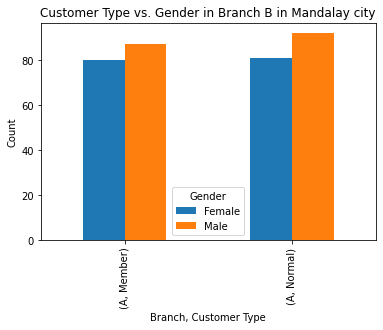

In [ ]:
# -Branch B in Mandalay city
data_2 = data[data['Branch'].isin(['B']) & data['City'].isin(['Mandalay'])]
data_2 = data_2.groupby(['Branch', 'Customer type', 'Gender']).size().reset_index(name='count')
pivoted_data = data_1.pivot(index=['Branch', 'Customer type'], columns='Gender', values='count')
pivoted_data.plot(kind='bar', stacked=False)
plt.title('Customer Type vs. Gender in Branch B in Mandalay city')
plt.xlabel('Branch, Customer Type')
plt.ylabel('Count')
plt.show()

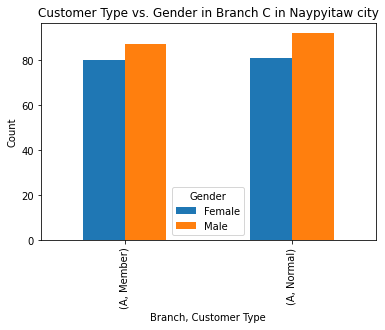

In [ ]:
#-Branch C in Naypyitaw city
data_3 = data[data['Branch'].isin(['C']) & data['City'].isin(['Naypyitaw'])]
data_3 = data_3.groupby(['Branch', 'Customer type', 'Gender']).size().reset_index(name='count')
pivoted_data = data_1.pivot(index=['Branch', 'Customer type'], columns='Gender', values='count')
pivoted_data.plot(kind='bar', stacked=False)
plt.title('Customer Type vs. Gender in Branch C in Naypyitaw city')
plt.xlabel('Branch, Customer Type')
plt.ylabel('Count')
plt.show()

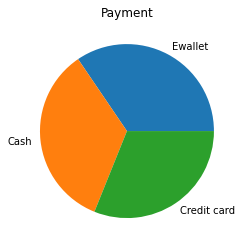

In [ ]:
# plot payment methods using pie chart
customer_counts = data['Payment'].value_counts()
plt.pie(customer_counts, labels=customer_counts.index)
plt.title('Payment')
plt.show()

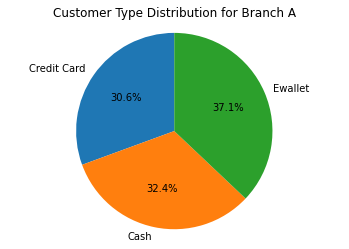

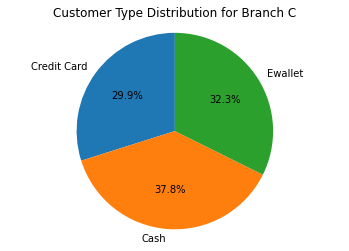

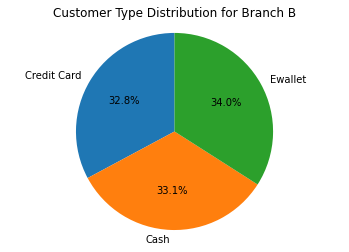

In [ ]:
# plot payment methods in each branch
grouped_data = data.groupby(['Branch', 'Payment']).size().reset_index(name='count')

branches = data['Branch'].unique()
for branch in branches:

    branch_data = grouped_data[grouped_data['Branch'] == branch]
    cred_count = branch_data[branch_data['Payment'] == 'Credit card']['count'].values[0]
    cash_count = branch_data[branch_data['Payment'] == 'Cash']['count'].values[0]
    ewall_count = branch_data[branch_data['Payment'] == 'Ewallet']['count'].values[0]

    labels = ['Credit Card', 'Cash','Ewallet']
    counts = [cred_count, cash_count,ewall_count]
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Customer Type Distribution for Branch {}'.format(branch))
    plt.show()

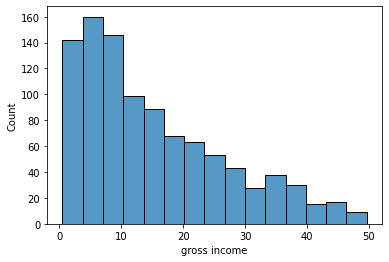

In [ ]:
# Distribution of Gross Income
sns.histplot(x='gross income',data=data)

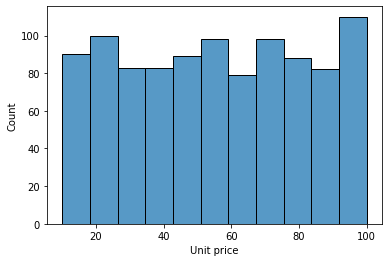

In [ ]:
# Distribution of Unit price
sns.histplot(x='Unit price',data=data)

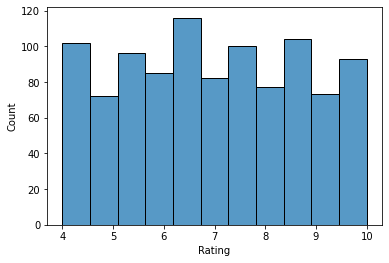

In [ ]:
# Distribution of Rating
sns.histplot(x='Rating',data=data)

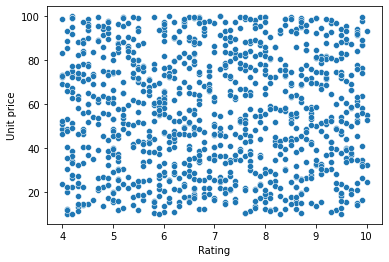

In [ ]:
# Rating VS Cost of goods sold using scatter plot
sns.scatterplot(x='Rating',
                y='Unit price',
                data=data)

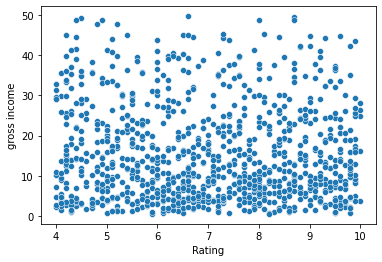

In [ ]:
# Rating VS gross income using scatter plot
sns.scatterplot(x='Rating',
                y='gross income',
                data=data)

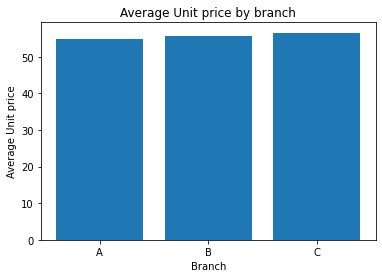

In [ ]:
# plot average of Unit price in each branch
branch_mean = data.groupby('Branch')['Unit price'].mean()
plt.bar(branch_mean.index, branch_mean.values)
plt.xlabel('Branch')
plt.ylabel('Average Unit price')
plt.title('Average Unit price by branch')
plt.show()

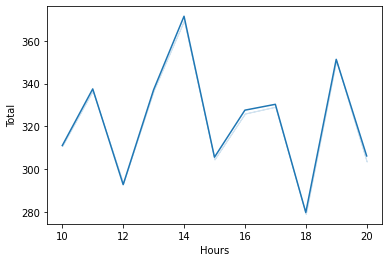

In [ ]:
# Product Sales per Hour using line plot
sns.lineplot(x='Hours',
             y='Total',
             data=data,ci=False)